In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_names=['id','ccf','age','sex','painloc','painexer','relrest','pncaden','cp','trestbps','htn','chol','smoke','cigs','years','fbs','dm','famhist','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur',
'thaltime','met','thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul',
'earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name']


dataset = pd.read_csv(r'data.csv', header=None, names=col_names)

In [3]:
graph2_selection=['age','sex','cp','trestbps', 'htn','chol','cigs','years','fbs','famhist','restecg','ekgmo','ekgday','ekgyr','dig','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest', 'tpeakbps', 'tpeakbpd', 'dummy','trestbpd', 'exang','xhypo','oldpeak','slope','rldv5e','ca','thal','cmo','cday','cyr','lmt', 'ladprox','laddist','cxmain','om1','rcaprox','rcadist','lvx3','lvx4','lvf']

In [4]:
X = dataset[graph2_selection].values
Y = dataset['num'].values

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-9, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = np.append(arr=np.ones((282, 1)).astype(int), values=X, axis=1)

In [6]:
import statsmodels.api as sm

def backwardElimination(x, sl):                                                                     #backward elemination\n",
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print(j)
                    print(x[:,j][0:10])
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x


In [7]:
SL = 0.01
X_opt = X
X_Modeled = backwardElimination(X_opt, SL) 


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Modeled, Y, random_state=0, 
test_size=0.2)

16
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
5
[1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
20
[13. 13. 10. 17.  9. 16.  7. 10.  9.  7.]
8
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203.]
41
[1. 1. 1. 1. 1. 1. 1. 1. 6. 1.]
3
[1. 4. 4. 3. 2. 2. 4. 4. 4. 4.]
13
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
23
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
23
[2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1]
2
[1. 1. 1. 1. 0. 1. 0. 0. 1. 1.]
4
[20. 40. 35.  0.  0. 20.  0.  0.  0. 25.]
23
[0. 3. 2. 0. 0. 0. 2. 0. 1. 0.]
12
[10.5  9.5  8.5 13.   7.  11.3  6.   9.   8.   5.5]
18
[ 85.  90.  80.  78.  86.  75. 100.  80. 105. 100.]
23
[16.  5. 20.  4. 18. 10.  2. 21.  3.  6.]
7
[ 3.  5. 19. 13.  7.  9. 28. 20.  2.  3.]
4
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
17
[3. 2. 2. 3. 1. 1. 3. 1. 2. 3.]
11
[150. 108. 129. 187. 172. 178. 160. 163. 147. 155.]
13
[ 90.  90.  80.  68.  74.  70.  84.  80.  70. 120.]
7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5
[2. 3. 2. 2. 2. 3. 1. 7. 7. 7.]
14
[2. 2. 2. 2. 2. 3.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
best_estimators = []
results = []

knn = KNeighborsClassifier()

paramKnn = [{'n_neighbors':[1,4,5,6,8,10], 
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto'], 
             'leaf_size':[10, 30, 50], 
             'metric':['minkowski', 'euclidean']}]

gridKnn = GridSearchCV(estimator=knn, param_grid=paramKnn, cv=10, scoring='accuracy', return_train_score=True)
gridKnn.fit(X_train, Y_train)
best_estimators.append({'estimator':gridKnn.best_estimator_, 
                       'accuracy':gridKnn.best_score_, 
                       'param':gridKnn.best_params_, 
                       'test_score':gridKnn.cv_results_})
results.append(gridKnn.cv_results_)

knn=gridKnn.best_estimator_
knn_accuracy = cross_val_predict(knn, X_train, Y_train, cv=10)
knn_y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(Y_test, knn_y_pred)

print(knn_accuracy)
print(knn_cm)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 3 0 3 1 0 1 0 0 1 0 1 0 0 0 3 0 0 2 0 3 2 0
 1 0 3 2 1 1 0 0 0 2 0 1 0 0 1 0 3 1 0 4 4 0 3 0 1 1 0 1 2 0 0 1 0 0 0 0 0
 0 0 2 0 0 3 0 0 0 0 1 0 0 1 1 3 0 0 0 0 0 0 0 0 1 0 3 1 0 3 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 3 0 3 2 0 0 1 0 0 1 0 0 0 0 0 3 1 0 1 0 3 0 0 3 2 0 3 2 0 3
 3 0 0 0 0 0 3 0 3 0 1 0 0 1 0 3 3 3 0 0 0 0 0 3 0 3 0 0 0 3 0 0 0 0 1 0 0
 0 0 2 0 3 0 0 0 1 0 0 0 0 2 0 1 0 0 2 0 1 0 0 1 4 2 0 1 0 0 0 0 1 1 4 1 1
 0 4 0]
[[29  0  0  0  0]
 [ 2  6  1  0  0]
 [ 0  2  6  0  0]
 [ 0  0  2  6  0]
 [ 0  0  0  2  1]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

best_estimators = []
results = []

nb = GaussianNB()

paramNb = [{}]

gridNb = GridSearchCV(estimator=nb, param_grid=paramNb, cv=10, scoring='accuracy', return_train_score=True)
gridNb.fit(X_train, Y_train)
best_estimators.append({'estimator':gridNb.best_estimator_, 
                       'accuracy':gridNb.best_score_, 
                       'param':gridNb.best_params_, 
                       'test_score':gridNb.cv_results_})
results.append(gridNb.cv_results_)

nb=gridNb.best_estimator_
nb_accuracy = cross_val_predict(estimator=nb, X=X_train, y=Y_train, cv=10)
nb_y_pred = nb.predict(X_test)
nb_cm = confusion_matrix(Y_test, nb_y_pred)

print(nb_accuracy)
print(nb_cm)

[0 0 2 0 0 0 1 2 2 1 0 0 0 0 1 3 0 4 1 1 1 0 0 1 0 1 0 0 0 2 0 0 3 0 3 3 0
 3 0 3 4 2 1 0 0 0 2 1 2 0 0 1 1 2 2 0 2 4 0 2 0 1 1 0 1 1 0 0 4 0 0 1 0 0
 0 0 4 0 0 2 0 0 0 0 3 0 0 2 1 3 0 0 0 0 0 0 0 0 1 0 3 1 0 2 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 2 0 2 2 0 0 1 0 0 1 0 0 0 0 1 3 1 0 1 0 3 0 0 1 3 0 2 2 0 3
 4 0 1 0 0 0 3 0 2 0 3 0 0 1 0 3 3 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 1 0 0
 0 0 1 0 3 0 0 0 1 0 0 0 0 3 0 1 0 0 2 0 1 0 0 1 4 1 0 3 0 0 0 0 4 1 2 1 1
 0 4 1]
[[29  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  2  5  1  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  3]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

# Initialize variables
best_estimators = []
results = []

# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Define the parameter grid for the decision tree
paramDt = [{'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}]

# Create the grid search object
gridDt = GridSearchCV(estimator=dt, param_grid=paramDt, cv=10, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
gridDt.fit(X_train, Y_train)

# Append the best estimator, accuracy, and parameters to the list
best_estimators.append({'estimator':gridDt.best_estimator_, 'accuracy':gridDt.best_score_, 'param':gridDt.best_params_, 'test_score':gridDt.cv_results_})

# Append the results to the list
results.append(gridDt.cv_results_)

# Set the decision tree classifier to the best estimator
dt=gridDt.best_estimator_

# Get the accuracy score using cross-validation
dt_accuracy = cross_val_score(estimator=dt, X=X_train, y=Y_train, cv=10)

# Predict the values for the test set
dt_y_pred = dt.predict(X_test)

# Create a confusion matrix
dt_cm = confusion_matrix(Y_test, dt_y_pred)


print(dt_accuracy)
print(dt_cm)


[1.         0.91304348 0.91304348 0.95652174 0.91304348 1.
 0.95454545 0.90909091 1.         0.90909091]
[[29  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0  3]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [11]:
from sklearn.neighbors import KNeighborsClassifier
k_nn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1, 
algorithm='ball_tree', leaf_size=30)
k_nn_classifier.fit(X_train, Y_train)
k_nn_y_pred = k_nn_classifier.predict(X_test) #predicted y values for X_train\n",
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

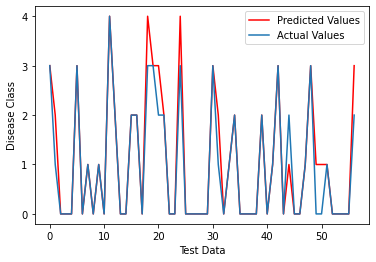

In [12]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(k_nn_classifier.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier;
dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(X_train, Y_train)
dt_y_pred = dt.predict(X_test)
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

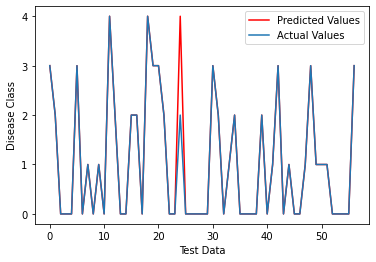

In [14]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(dt.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier;
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

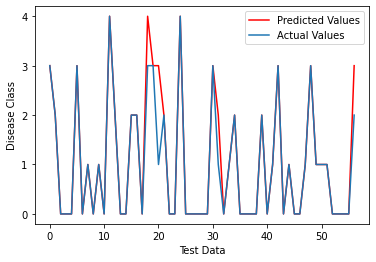

In [16]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(rf.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [17]:
from sklearn import metrics

k_nn_acc = metrics.accuracy_score(Y_test, k_nn_y_pred)
dt_acc = metrics.accuracy_score(Y_test, dt_y_pred)
rf_acc = metrics.accuracy_score(Y_test, rf_y_pred)

print("KNN accuracy:", k_nn_acc)
print("DT accuracy:", dt_acc)
print("RF accuracy:", rf_acc)

KNN accuracy: 0.8421052631578947
DT accuracy: 0.9824561403508771
RF accuracy: 0.9298245614035088
